<a href="https://colab.research.google.com/github/nanangyudi/2020pds_b/blob/main/Shafa_Anindya_Nur_Allifya_185150400111003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama: Shafa Anindya Nur Allifya
# NIM: 185150400111003
# Kelas: PDS B

# **Analisis Top 2000 Spotify Songs**
Analisis musik yang termasuk ke dalam Top 2000 *Spotify*

# **Deskripsi Tujuan Bisnis**
Spotify merupakan salah satu platform favorit bagi masyarakat terutama kalangan remaja untuk *streaming* musik digital, podcast, ataupun video. Layanan Spotify memberikan akses pada penggunanya ke jutaan lagu dan konten lain dari artis di seluruh dunia.

Analisis ini akan memberitahu mengenai lagu-lagu seperti apakah yang populer dan termasuk ke dalam top 2000 Spotify Songs di beberapa negara. Analisis ini diharapkan akan mampu menginspirasi dan juga membantu pihak-pihak yang membutuhkan seperti produser, artis, dan juga para konten kreator lainnya dalam pembuatan karya selanjutnya.

# **Analisa Pendekatan yang Dilakukan**

Dalam Analisa ini, akan diketahui mengenai apa saja karakteristik lagu yang memungkinkan masuk ke dalam Top 2000 Spotify jika dilihat dari detail dan kualitas lagu. Analisa akan dilakukan dengan menggambarkan data dengan grafik.


# **Pengumpulan Data**
Dalam proyek ini pengumpulan data dilakukan dengan mencari sumber data / dataset yang sudah ada atau diunggah dalam website Kaggle.com dengan link https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset.

# **Pemahaman Terhadap Data yang Telah Dikumpulkan**
Dataset ini terdiri atas kumpulan lagu / track yang termasuk ke dalam top 2000 tracks di Spotify yang dirilis pada tahun 1956 sampai tahun 2019. Dataset ini ditampilkan dalam 15 kolom yang menjelaskan setiap track dan kualitasnya, yakni:


1.   ID: Index
2.   Title: Name of the Track
3.   Artist: Name of the Artist
4.   Top Genre: Genre of the Track
5.   Year: Release Year of the Track
6.   BPM (Beats per Minute): The Tempo of the Song
7.   Energy: The energy of a song - the higher the value, the more energetic the song
8.   Danceability: The higher the value, the easier it is to dance to this song.
9.   dB (Loudness): The higher the value, the louder the song.
10.  Liveness
11.  Valence: The higher the value, the more positive mood for the song.
12.  Length (Duration): The duration of the song.
13.  Acoustic: The higher the value the more acoustic the song is.
14.  Speechiness: The higher the value the more spoken words the song contains
15.  Popularity: The higher the value the more popular the song is.








# **Persiapan Data**

Melakukan load dataset dari file Spotify-2000.csv








In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
dataLagu = pd.read_csv("https://raw.githubusercontent.com/Shafaani3/data/main/Spotify-2000.csv")
dataLagu.head(1994)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


Untuk menampilkan data label baris dan kolom:

In [ ]:
dataLagu.axes

[RangeIndex(start=0, stop=1994, step=1),
 Index(['Index', 'Title', 'Artist', 'Top Genre', 'Year',
        'Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)',
        'Liveness', 'Valence', 'Length (Duration)', 'Acousticness',
        'Speechiness', 'Popularity'],
       dtype='object')]

Untuk menampilkan gambaran data terutama info apakah ada data kosong / null atau tidak:

In [ ]:
dataLagu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [ ]:
dataLagu.empty

False

Untuk menampilkan daftar tipe data setiap kolom:

In [ ]:
dataLagu.dtypes

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

Untuk menampilkan ukuran data:

In [ ]:
dataLagu.size

29910

Untuk menampilkan jumlah baris dan kolom:

In [ ]:
dataLagu.shape

(1994, 15)

Untuk menampilkan ringkasan singkat mengenai nilai-nilai pada kolom dalam bentuk statistika tentang data:


In [ ]:
dataLagu.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,99.000000,55.000000,100.00000


# **Eksplorasi Data**

> **Mengetahui artis mana saja yang berada dalam Top 10 Popularity**



In [ ]:
ArtistTop = dataLagu[dataLagu['Popularity'].isin([90, 89, 88, 87, 86, 85, 84, 83, 82, 81])] 
ArtistTop.shape

(66, 15)

In [ ]:
ArtistTop[ArtistTop['Popularity'] == ArtistTop['Popularity'].max()]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
688,689,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,88
726,727,Shallow,Lady Gaga,dance pop,2018,96,39,57,-6,23,32,216,37,3,88


In [ ]:
ArtistTop.value_counts("Artist").head(10)

Artist
Imagine Dragons          5
Ed Sheeran               5
Coldplay                 4
AC/DC                    3
Lady Gaga                2
Linkin Park              2
Red Hot Chili Peppers    2
Twenty One Pilots        2
Bon Jovi                 1
Elton John               1
dtype: int64

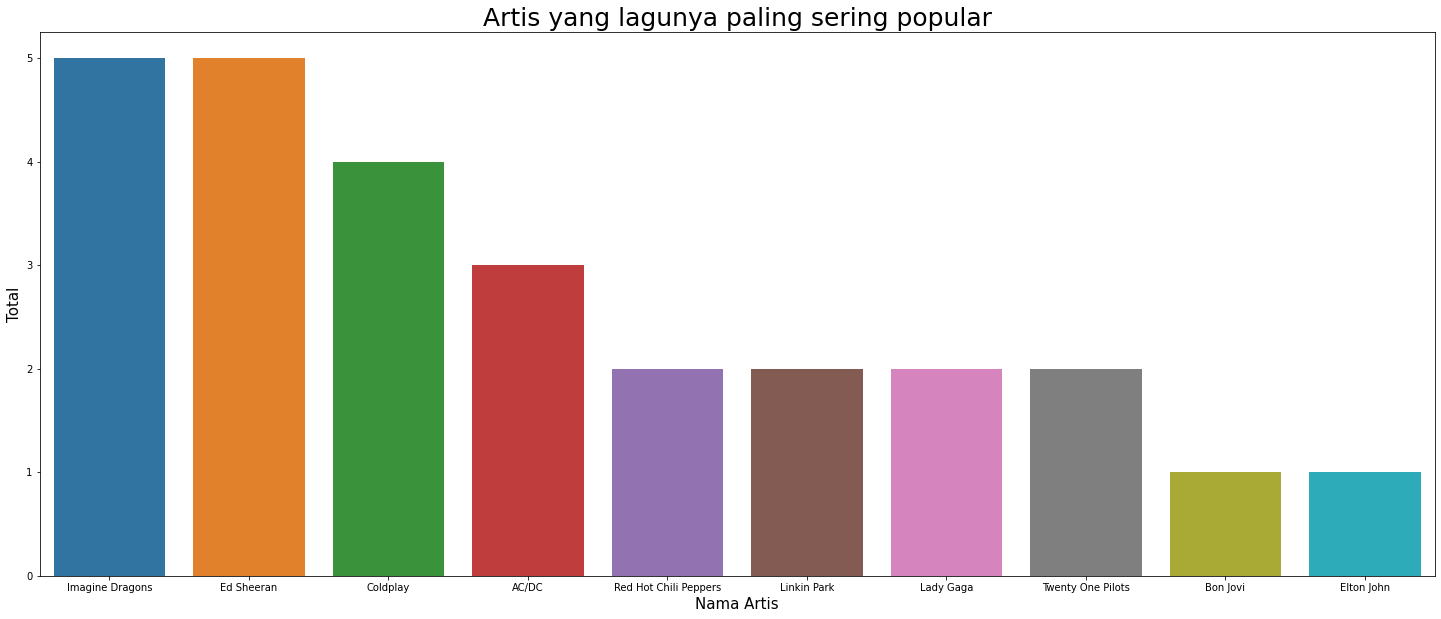

In [ ]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Artist',  data=ArtistTop, order = ['Imagine Dragons', 'Ed Sheeran', 'Coldplay', 'AC/DC', 'Red Hot Chili Peppers', 'Linkin Park', 'Lady Gaga', 'Twenty One Pilots', 'Bon Jovi', 'Elton John'] );
plt.title("Artis yang lagunya paling sering popular", fontsize = 25)
plt.xlabel("Nama Artis", fontsize = 15)
plt.ylabel("Total", fontsize = 15)
plt.show()



> **Mengetahui 10 genre yang paling diminati**












In [ ]:
GenreFav = dataLagu[dataLagu['Popularity'].isin([90,89,88,87,86,85,84,83,82,81])] 
GenreFav.shape

(66, 15)

In [ ]:
GenreFav[GenreFav['Popularity'] == GenreFav['Popularity'].max()]

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
688,689,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,88
726,727,Shallow,Lady Gaga,dance pop,2018,96,39,57,-6,23,32,216,37,3,88


In [ ]:
GenreFav.value_counts("Top Genre").head(10)

Top Genre
dance pop            10
pop                   8
album rock            8
modern rock           7
permanent wave        4
alternative rock      4
alternative metal     2
canadian pop          2
dance rock            2
neo mellow            2
dtype: int64

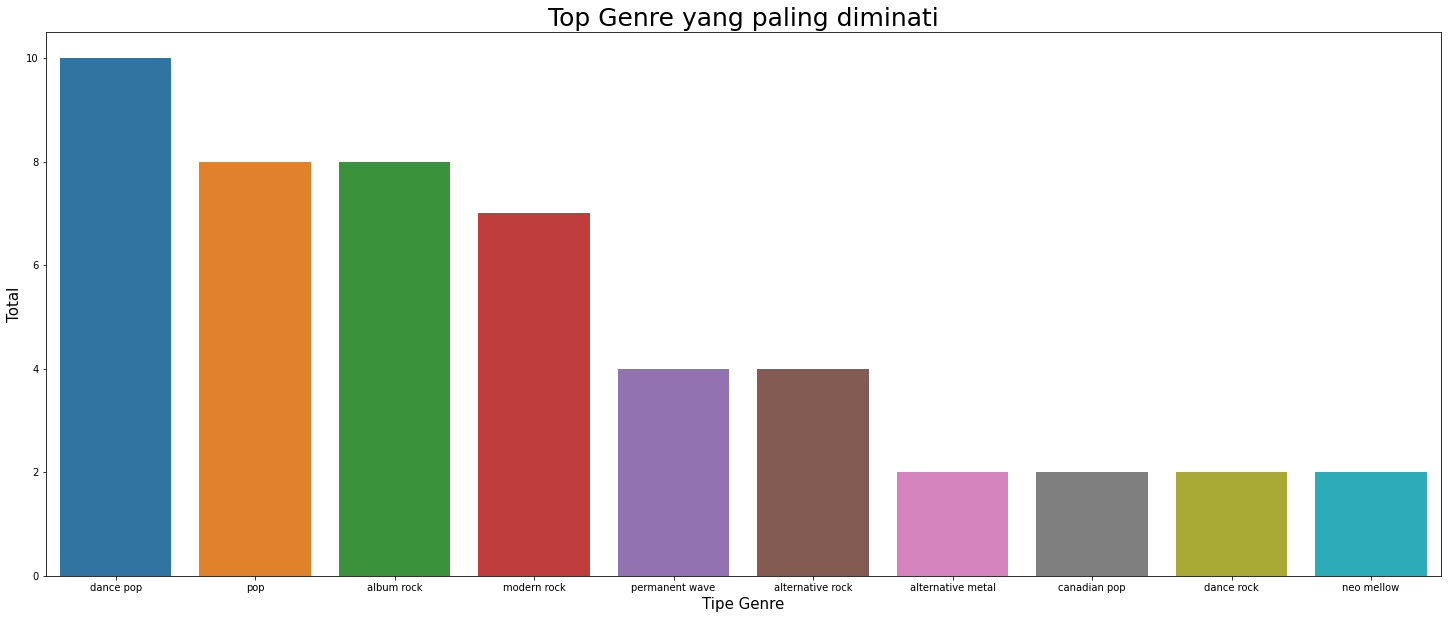

In [ ]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Top Genre',  data=GenreFav, order = ['dance pop', 'pop', 'album rock','modern rock','permanent wave', 'alternative rock', 'alternative metal', 'canadian pop', 'dance rock', 'neo mellow'] );
plt.title("Top Genre yang paling diminati", fontsize = 25)
plt.xlabel("Tipe Genre", fontsize = 15)
plt.ylabel("Total", fontsize = 15)
plt.show()



> **Mengetahui lagu dengan popularitas tertinggi:**



In [ ]:
dataLagu.sort_values(["Popularity"], ascending=False, inplace=True)
dataLagu.reset_index(inplace=True, drop=True)

print(dataLagu)

      Index                            Title  ... Speechiness Popularity
0       794                     Dance Monkey  ...           9        100
1       788                         Memories  ...           5         98
2       787                          bad guy  ...          38         95
3      1642  All I Want for Christmas Is You  ...           4         95
4       689                         Believer  ...          13         88
...     ...                              ...  ...         ...        ...
1989    606                  Het Dorp - Live  ...           8         15
1990    412                 Peter Gunn Theme  ...           3         14
1991    625              Three Days In A Row  ...           3         13
1992    774                 Hou Vol Hou Vast  ...           2         12
1993   1794                        Sacrifice  ...           5         11

[1994 rows x 15 columns]


In [ ]:
LaguFavo = dataLagu[dataLagu['Title'].isin(['Dance Monkey', 'Memories', 'bad guy', 'All I Want For Christmas Is You', 'Believer'])] 
LaguFavo.shape

(5, 15)

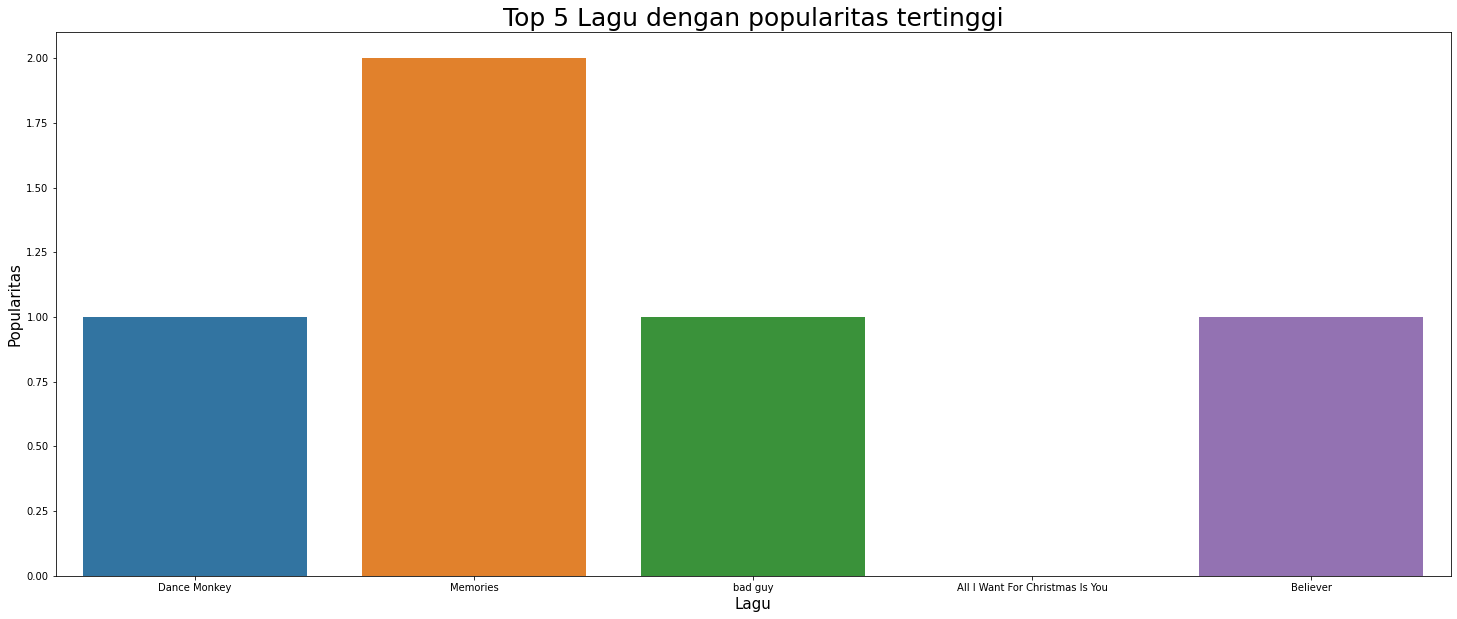

In [ ]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Title', data= LaguFavo, order = ['Dance Monkey', 'Memories', 'bad guy', 'All I Want For Christmas Is You', 'Believer']);
plt.title("Top 5 Lagu dengan popularitas tertinggi", fontsize = 25)
plt.xlabel("Lagu", fontsize = 15)
plt.ylabel("Popularitas", fontsize = 15)

plt.show()



> **Mengetahui jumlah lagu yang masuk dalam daftar TOP 2000 yang dirilis setiap tahunnya:**



In [ ]:
dataLagu.value_counts("Year")

Year
2008    54
2018    52
1991    52
1977    51
2002    47
        ..
1962     3
1959     3
1961     1
1960     1
1956     1
Length: 63, dtype: int64

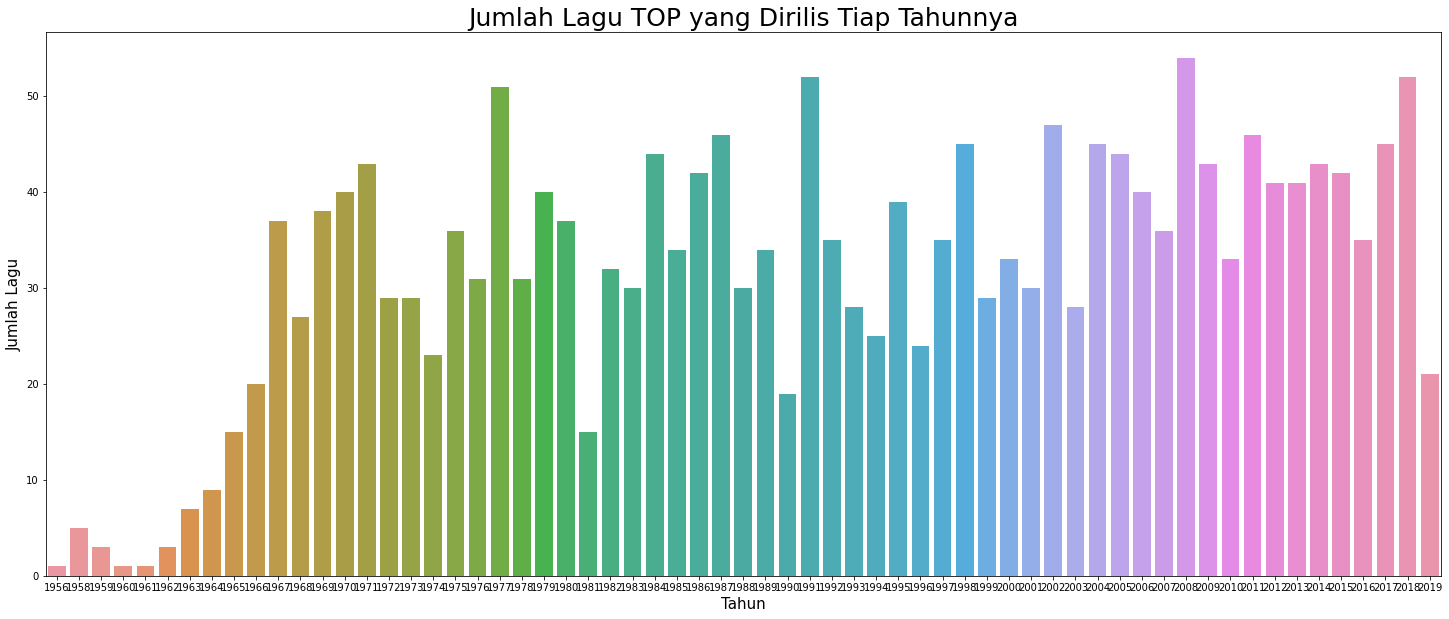

In [ ]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Year', data= dataLagu);
plt.title("Jumlah Lagu TOP yang Dirilis Tiap Tahunnya", fontsize = 25)
plt.xlabel("Tahun", fontsize = 15)
plt.ylabel("Jumlah Lagu", fontsize = 15)

plt.show()



> **Mengetahui Jenis Tempo Lagu yang Paling Disukai**



In [ ]:
dataLagu.value_counts("Beats Per Minute (BPM)").head(5)

Beats Per Minute (BPM)
125    40
127    39
123    38
120    38
117    36
dtype: int64

In [ ]:
JenisBPM = dataLagu[dataLagu['Beats Per Minute (BPM)'].isin([125,127,123,120,117])] 
JenisBPM.shape

(191, 15)

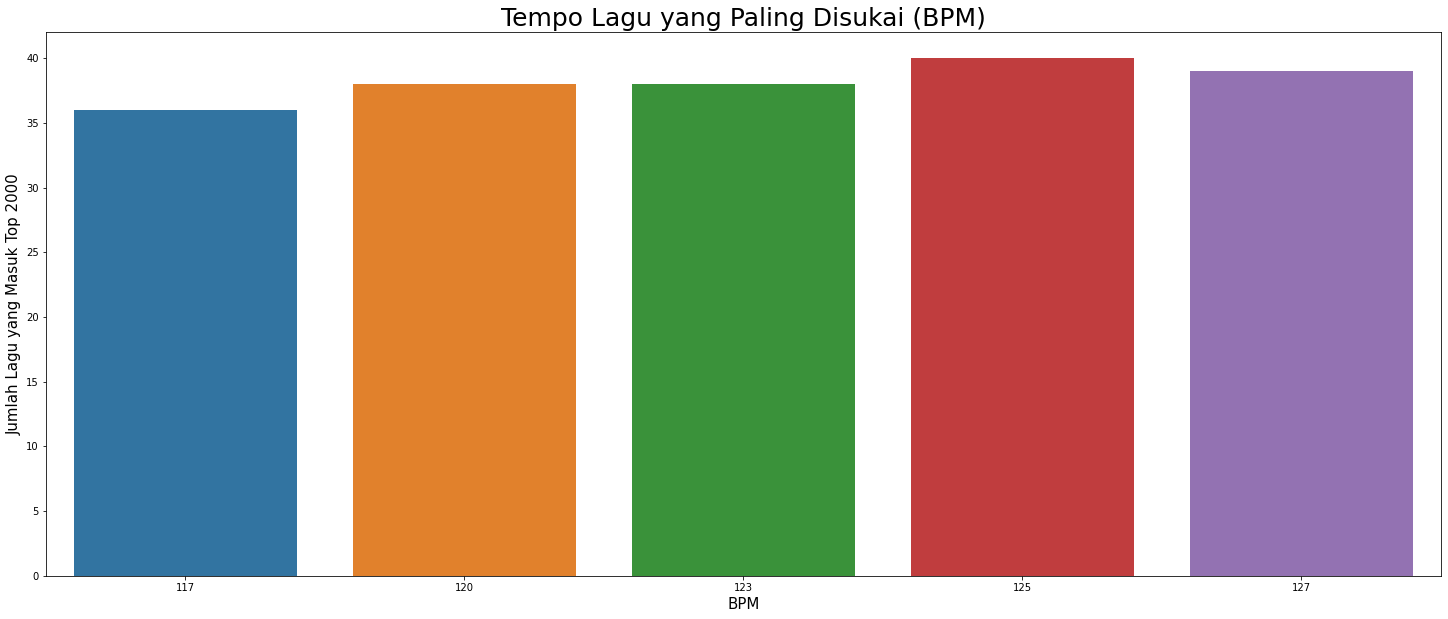

In [ ]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Beats Per Minute (BPM)', data= JenisBPM);
plt.title("Tempo Lagu yang Paling Disukai (BPM)", fontsize = 25)
plt.xlabel("BPM", fontsize = 15)
plt.ylabel("Jumlah Lagu yang Masuk Top 2000", fontsize = 15)

plt.show()



> **Mengetahui tingkat kenyaringan lagu yang paling disukai:**





In [ ]:
dataLagu.value_counts("Loudness (dB)").head(5)

Loudness (dB)
-7     256
-6     225
-9     220
-8     199
-10    179
dtype: int64

In [ ]:
Nyaringnya = dataLagu[dataLagu['Loudness (dB)'].isin([-7,-6,-9,-8,-10])] 
Nyaringnya.shape

(1079, 15)

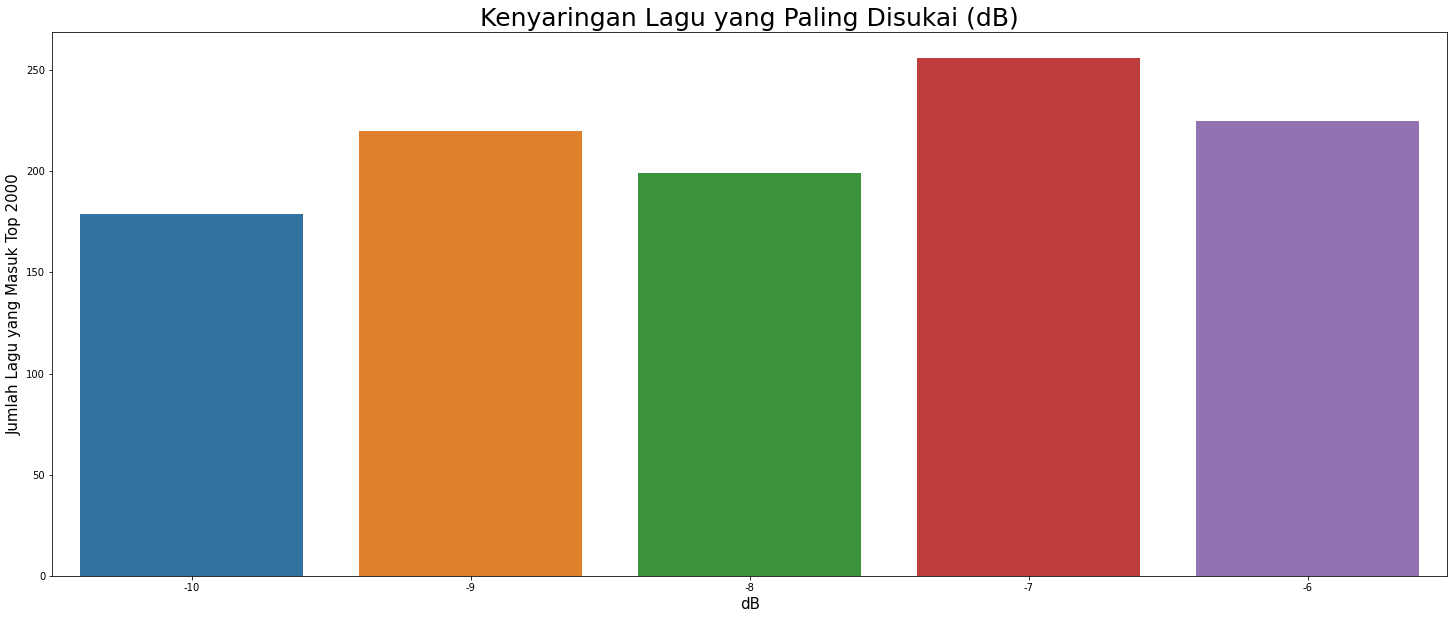

In [ ]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Loudness (dB)', data= Nyaringnya);
plt.title("Kenyaringan Lagu yang Paling Disukai (dB)", fontsize = 25)
plt.xlabel("dB", fontsize = 15)
plt.ylabel("Jumlah Lagu yang Masuk Top 2000", fontsize = 15)

plt.show()


> **Mengetahui jenis lagu yang paling disukai (Energetic or Not)**





In [ ]:
dataLagu.value_counts("Energy").head(5)

Energy
76    40
66    39
72    37
80    35
59    35
dtype: int64

In [ ]:
Enrgy = dataLagu[dataLagu['Energy'].isin([76,66,72,80,59])] 
Enrgy.shape

(186, 15)

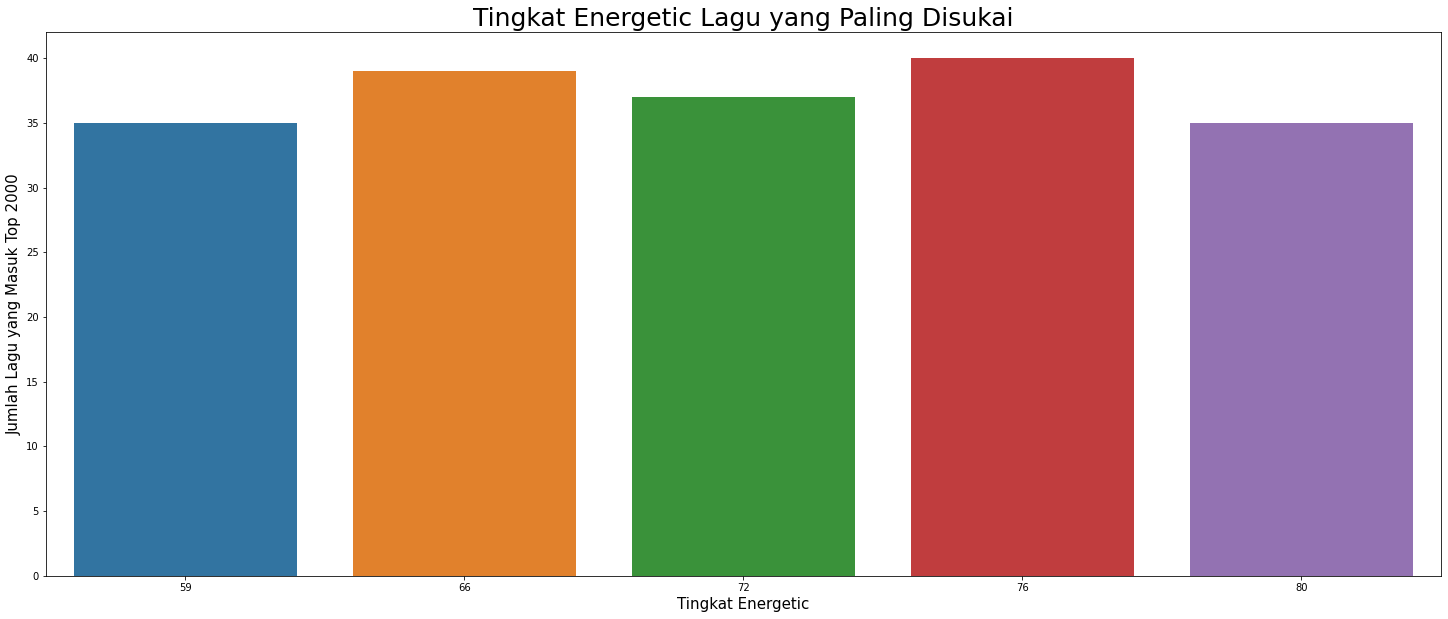

In [ ]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Energy', data= Enrgy);
plt.title("Tingkat Energetic Lagu yang Paling Disukai", fontsize = 25)
plt.xlabel("Tingkat Energetic", fontsize = 15)
plt.ylabel("Jumlah Lagu yang Masuk Top 2000", fontsize = 15)

plt.show()



> **Mengetahui jenis lagu yang paling disukai (Membawa mood positif atau sebaliknya)**



In [ ]:
dataLagu.value_counts("Valence").head(5)

Valence
30    35
33    34
37    32
49    32
42    31
dtype: int64

In [ ]:
Mood = dataLagu[dataLagu['Valence'].isin([30,33,37,49,42])] 
Mood.shape

(164, 15)

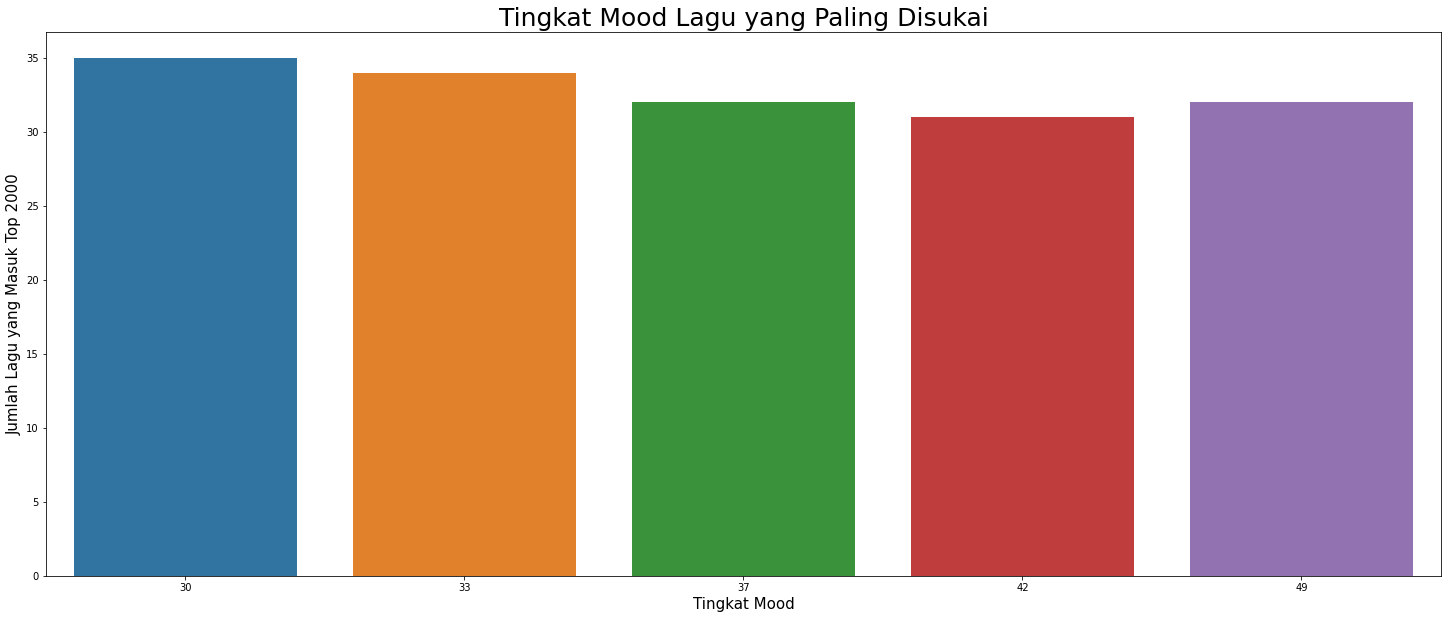

In [ ]:
plt.figure(figsize = (25,10));
t = {'fontsize': 15}
sns.countplot(x='Valence', data= Mood);
plt.title("Tingkat Mood Lagu yang Paling Disukai", fontsize = 25)
plt.xlabel("Tingkat Mood", fontsize = 15)
plt.ylabel("Jumlah Lagu yang Masuk Top 2000", fontsize = 15)

plt.show()

# **Pemodelan Data**



> **Plotingan semua data bertipe numerik dengan kolom Popularity**



In [ ]:
numerical_values=["BPM (Beats per Minute)", "Energy", "Danceability", "dB (Loudness)", "Liveness", "Valence", "Length (Duration)", "Acoustic", "Speechiness"]

In [ ]:
from sklearn import preprocessing
x = dataLagu.drop(["Index", "Title", "Artist", "Top Genre", "Year"], axis=1) #returns a numpy array
dataPlot = pd.DataFrame(x)

In [ ]:
dataPlot.columns = ["BPM (Beats per Minute)", "Energy", "Danceability", "dB (Loudness)", "Liveness", "Valence", "Length (Duration)", "Acoustic", "Speechiness", "Popularity"]

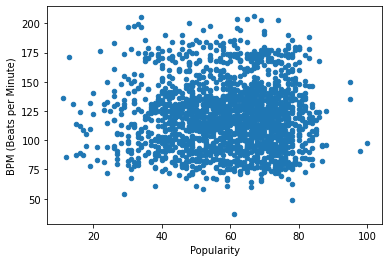

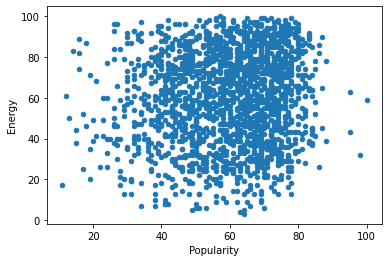

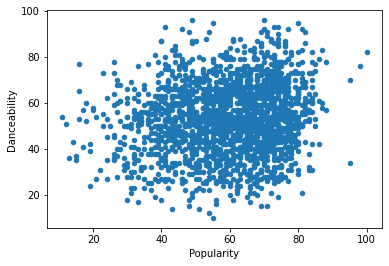

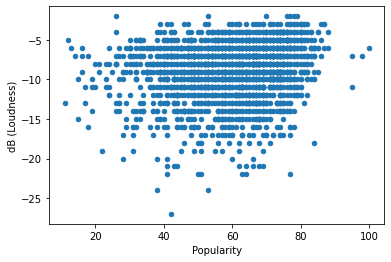

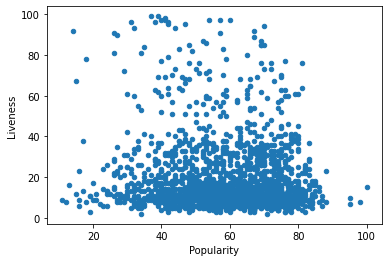

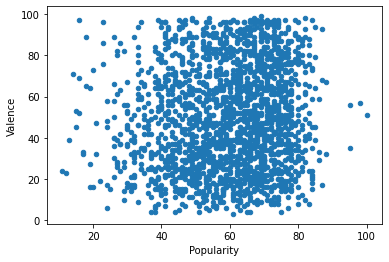

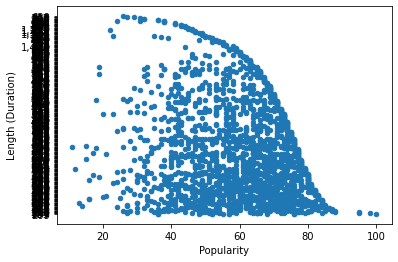

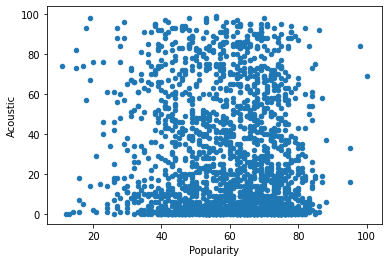

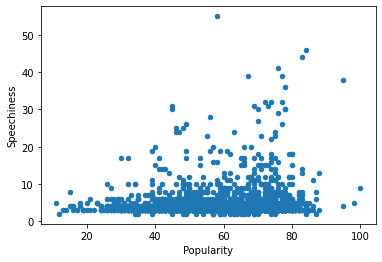

In [ ]:
for val in ("BPM (Beats per Minute)", "Energy", "Danceability", "dB (Loudness)", "Liveness", "Valence", "Length (Duration)", "Acoustic", "Speechiness"):
    dataPlot.plot.scatter(x="Popularity", y=val)

# **Kesimpulan**

Lagu-lagu yang populer dari kurun waktu 1956-2019 biasanya memiliki karakteristik sebagai berikut:
1. Bertempo 125 / 127 Beats per Minute.
2. Bergenre Dance pop atau Pop atau Album Rock atau Modern Rock atau Permanent Wave atau Alternative Rock, atau Alternative Metal, atau Canadian Pop, atau Dance Rock, atau Neo Mellow.
3. Energetic. 
4. Tingkat kenyaringan suaranya adalah -6 sampai -10 dB (desibel).
5. Bisa dibuat untuk dance.
6. Membawa mood positif sekitar 30%-49%
7. Durasi dengan tingkat angka 215 atau 243 atau 217 atau 241 atau 236.
8. Sebagian besar tidak bertipe akustik.
9. Sebagian besar hanya mempunyai 3 sampai 6 kata yang terucap.


Artis yang paling sering masuk ke dalam Popularity Song adalah: Imagine Dragons, Ed Sheeran, Coldplay, AC/DC, Red Hot Chili Peppers, Linkin Park, Lady Gaga, Twenty One Pilots, Billie Eilish, dan Elton John. Kemudian, ada banyak lagu populer yang dirilis pada tahun 2008 dan 2018.


# **Evaluasi Model**



Evaluasi bisa dilihat pada daftar 20 lagu paling popular dari dataset.

In [ ]:
PopularSong = dataLagu[dataLagu['Popularity'].isin([100,99,98,97,96,95,94,93,92,91,90,89,88,87,86,85,84,83,82,81])] 
PopularSong.head(20)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,794,Dance Monkey,Tones and I,australian pop,2019,98,59,82,-6,15,51,209,69,9,100
1,788,Memories,Maroon 5,pop,2019,91,32,76,-7,8,57,189,84,5,98
2,787,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,95
3,1642,All I Want for Christmas Is You,Mariah Carey,dance pop,1994,150,63,34,-7,7,35,241,16,4,95
4,689,Believer,Imagine Dragons,modern rock,2017,125,78,78,-4,8,67,204,6,13,88
5,727,Shallow,Lady Gaga,dance pop,2018,96,39,57,-6,23,32,216,37,3,88
6,684,Perfect,Ed Sheeran,pop,2017,95,45,60,-6,11,17,263,16,2,87
7,688,Shape of You,Ed Sheeran,pop,2017,96,65,83,-3,9,93,234,58,8,87
8,746,High Hopes,Panic! At The Disco,baroque pop,2018,82,90,58,-3,6,68,191,19,6,87
9,530,All of Me,John Legend,neo mellow,2013,120,26,42,-7,13,33,270,92,3,86


**Dari tabel Popular Song di atas, bisa dilihat bahwa kesimpulan yang dihasilkan dari permodelan berupa plot telah hampir sesuai.**

# **Review Mengenai Perjalanan Data di Atas:**

1. Menetapkan tujuan (bisnis):  What, why and how dari suatu proyek.
2. Mengumpulkan data: Proses di mana data dikumpulkan kemudian diperiksa dan dipastikan telah tersedia.
3. Mempersiapkan data: Proses dimana data akan disiapkan dengan cara membersihkan.
4. Mengeksplorasi data: Proses untuk mempelajari korelasi antar variabel data, frekuensi dan distribusinya.
5. Memodelkan data: Proses pemilihan teknik algoritma yang baik.
6. Evaluasi: Memastikan apakah model sudah sesuai.
